<a href="https://colab.research.google.com/github/alouvre/BPDS_DicodingSubmission_Proyek_Pertama_Dashboard_HR/blob/main/BPDS_Submission_Proyek_Pertama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Pertama : Menyelesaikan Permasalahan departemen Human Resources (HR) di Perusahaan Jaya Maju

- Nama: Alifia Mustika Sari
- Email: alifiamustika02@gmail.com
- ID Dicoding:

## Business Understanding

### Latar Belakang

Jaya Jaya Maju adalah perusahaan multinasional yang telah beroperasi sejak tahun 2000 dengan lebih dari 1000 karyawan yang tersebar di seluruh penjuru negeri. Meskipun telah menjadi perusahaan besar, Jaya Jaya Maju masih menghadapi tantangan serius dalam pengelolaan karyawan. Salah satu indikator utama dari permasalahan ini adalah tingginya tingkat attrition rate (rasio karyawan yang keluar terhadap total karyawan), yang mencapai lebih dari 10%.

Tingginya angka ini dikhawatirkan akan berdampak pada produktivitas, efisiensi operasional, dan stabilitas perusahaan dalam jangka panjang. Oleh karena itu, manajemen HR ingin mengidentifikasi faktor-faktor utama yang memengaruhi tingginya tingkat pergantian karyawan dan membuat sistem pemantauan yang efektif.

### Permasalahan Bisnis

Bagaimana Jaya Jaya Maju dapat mengurangi tingkat pergantian karyawan yang tinggi untuk meningkatkan produktivitas, efisiensi operasional, dan stabilitas bisnisnya di masa depan?

Pertanyaan utama ini dapat diuraikan menjadi beberapa sub-masalah:
- Apa faktor-faktor utama yang menyebabkan tingginya tingkat attrition di Jaya Jaya Maju?
- Bagaimana kepuasan kerja, keseimbangan kehidupan kerja, pengembangan karir, dan budaya organisasi saat ini mempengaruhi keputusan karyawan untuk tetap atau keluar dari perusahaan?
- Strategi apa yang dapat diterapkan oleh manajemen untuk meningkatkan retensi dan kepuasan karyawan?
- Bagaimana model machine learning dapat membantu memprediksi risiko karyawan keluar dari perusahaan secara dini?

### Tujuan Proyek

- Mengidentifikasi faktor-faktor utama yang berkontribusi terhadap tingginya attrition rate.
- Menyediakan alat bantu visual berupa dashboard interaktif untuk membantu HR memantau tren dan distribusi data karyawan.
- Mengembangkan model prediktif yang dapat membantu perusahaan dalam pengambilan keputusan strategis terkait retensi karyawan.

### Cakupan Proyek

Untuk menjawab permasalahan di atas, proyek ini memiliki dua fokus utama:

- Pembuatan Business Dashboard

    Dashboard ini akan digunakan untuk memantau berbagai faktor yang memengaruhi tingginya attrition rate karyawan berdasarkan data historis. Visualisasi akan mencakup metrik-metrik penting seperti distribusi usia, tingkat kepuasan kerja, kebiasaan lembur, hingga distribusi berdasarkan departemen atau jabatan.

- Pengembangan Model Machine Learning

    Proyek ini juga mencakup pembuatan model machine learning yang mampu memprediksi kemungkinan seorang karyawan akan keluar dari perusahaan (attrition prediction). Model ini bertujuan untuk membantu tim HR mengidentifikasi karyawan yang berisiko tinggi keluar lebih awal, sehingga intervensi atau strategi retensi dapat dilakukan secara proaktif. Untuk itu, akan disusun skrip Python sederhana sebagai bagian dari proses prediksi ini.

## Persiapan Proyek

### Menyiapkan Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
import os
import shutil

### Menyiapkan Gdrive Proyek

In [3]:
# Mount Google Drive
drive.mount('/content/drive')

# Path tujuan proyek di Google Drive
target_path = '/content/drive/MyDrive/BPDS/Proyek_Pertama'

# Cek apakah path ada, lalu berpindah ke direktori tersebut
if os.path.exists(target_path):
    os.chdir(target_path)
    print(f"✅ Berhasil berpindah ke direktori: {os.getcwd()}")
else:
    print(f"❌ Path tidak ditemukan: {target_path}. Periksa kembali lokasi foldernya.")

Mounted at /content/drive
✅ Berhasil berpindah ke direktori: /content/drive/MyDrive/BPDS/Proyek_Pertama


### Menyiapkan dan Memuat Dataset

In [8]:
pd.set_option('display.max_columns', None)

url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv"
df_employee = pd.read_csv(url)

print("Jumlah data karyawan:", len(df_employee.EmployeeId))

Jumlah data karyawan: 1470


In [9]:
df_employee.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2


## Data Understanding

### Karakteristik Dataset

| Kolom                        | Deskripsi                                                                                    |
| ---------------------------- | -------------------------------------------------------------------------------------------- |
| **EmployeeId**               | ID unik untuk setiap karyawan.                                                               |
| **Attrition**                | Status keluar dari perusahaan (0 = Tidak keluar, 1 = Keluar)                                 |
| **Age**                      | Umur karyawan.                                                                               |
| **BusinessTravel**           | Frekuensi perjalanan dinas.                                                                  |
| **DailyRate**                | Gaji harian.                                                                                 |
| **Department**               | Departemen tempat karyawan bekerja.                                                          |
| **DistanceFromHome**         | Jarak dari rumah ke kantor (dalam km).                                                       |
| **Education**                | Tingkat pendidikan (1 = Di bawah kuliah, 2 = Kuliah, 3 = S1, 4 = S2, 5 = S3)              |
| **EducationField**           | Bidang studi pendidikan terakhir.                                                            |
| **EnvironmentSatisfaction**  | Kepuasan terhadap lingkungan kerja (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi)   |
| **Gender**                   | Jenis kelamin karyawan.                                                                      |
| **HourlyRate**               | Gaji per jam.                                                                                |
| **JobInvolvement**           | Tingkat keterlibatan dalam pekerjaan (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi) |
| **JobLevel**                 | Level pekerjaan (1 hingga 5).                                                                |
| **JobRole**                  | Jabatan atau peran pekerjaan.                                                                |
| **JobSatisfaction**          | Kepuasan terhadap pekerjaan (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi)          |
| **MaritalStatus**            | Status pernikahan.                                                                           |
| **MonthlyIncome**            | Gaji bulanan.                                                                                |
| **MonthlyRate**              | Tarif bulanan (mungkin nilai kompensasi tambahan).                                           |
| **NumCompaniesWorked**       | Jumlah perusahaan tempat karyawan pernah bekerja.                                            |
| **Over18**                   | Apakah usia karyawan di atas 18 tahun?                                                       |
| **OverTime**                 | Apakah karyawan sering lembur?                                                               |
| **PercentSalaryHike**        | Persentase kenaikan gaji tahun lalu.                                                         |
| **PerformanceRating**        | Penilaian kinerja (1 = Rendah, 2 = Baik, 3 = Sangat Baik, 4 = Luar Biasa)                   |
| **RelationshipSatisfaction** | Kepuasan terhadap hubungan kerja (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi)     |
| **StandardHours**            | Jumlah jam kerja standar (biasanya tetap).                                                   |
| **StockOptionLevel**         | Level opsi saham yang dimiliki.                                                              |
| **TotalWorkingYears**        | Total tahun pengalaman kerja.                                                                |
| **TrainingTimesLastYear**    | Jumlah pelatihan yang diikuti tahun lalu.                                                    |
| **WorkLifeBalance**          | Keseimbangan kerja dan kehidupan (1 = Rendah, 2 = Baik, 3 = Sangat Baik, 4 = Luar Biasa)     |
| **YearsAtCompany**           | Lama bekerja di perusahaan saat ini.                                                         |
| **YearsInCurrentRole**       | Lama bekerja di posisi saat ini.                                                             |
| **YearsSinceLastPromotion**  | Lama sejak promosi terakhir.                                                                 |
| **YearsWithCurrManager**     | Lama bekerja dengan manajer saat ini.                                                        |


### Data Assessing

#### Menilai Data

In [10]:
# Menampilkan ringkasan informasi dari dataset
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [11]:
df_employee.describe(include="all")

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,735.500000,36.923810,0.169187,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [12]:
df_employee.shape

(1470, 35)

Dari eksekusi method `df_employee.shape` Terlihat:

| JUMLAH BARIS AWAL | JUMLAH KOLOM AWAL |
| ------ | ------ |
| 1470 | 35 |

<br>

#### Cek Duplikasi Data

In [13]:
# Cek duplikat berdasarkan Place_Id
duplicate_employee_id = df_employee[df_employee.duplicated('EmployeeId', keep=False)]

print("Mengecek Duplikat berdasarkan EmployeeId:")
duplicate_employee_id

Mengecek Duplikat berdasarkan EmployeeId:


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


#### Cek Missing Value

In [14]:
# Cek missing values untuk tourism_with_id.csv
print("Nissing values pada tourism_with_id.csv:")
print((df_employee.isnull().sum()))

Nissing values pada tourism_with_id.csv:
EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0

#### Cek Outlier

In [17]:
def plot_numeric_boxplots(df, figsize_base=(12, 4)):
    """
    Menampilkan boxplot untuk semua fitur numerik dalam DataFrame.

    Parameters:
        df (DataFrame): DataFrame yang berisi data numerik.
        figsize_base (tuple): Ukuran dasar figure (lebar, tinggi per plot).
    """
    # Custom palette
    custom_palette = sns.color_palette("YlOrBr", 3)  # Ambil 3 warna

    # Ambil hanya kolom numerik
    numeric_cols = df.select_dtypes(include=['number']).columns
    n_cols = len(numeric_cols)

    # Set ukuran figure
    plt.figure(figsize=(figsize_base[0], figsize_base[1] * n_cols))

    # Plot boxplot untuk setiap kolom numerik
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_cols, 1, i)
        sns.boxplot(x=df[col], color=custom_palette[1])
        plt.title(f'Boxplot: {col}')
        plt.xlabel(col)
        plt.grid(axis='x', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

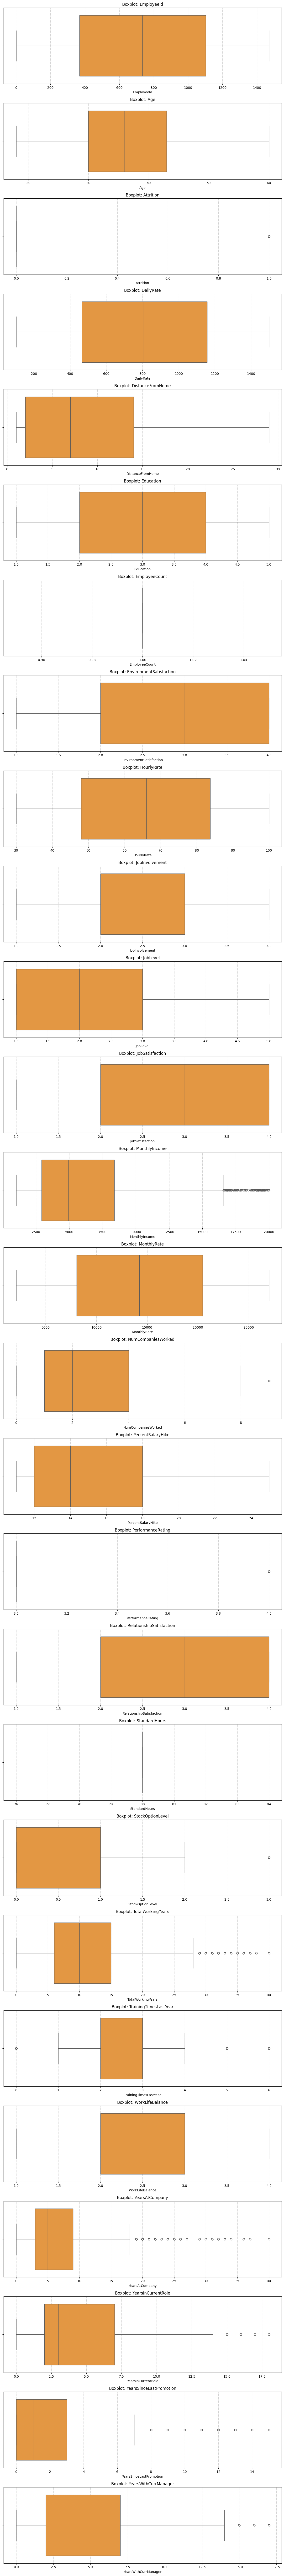

In [18]:
plot_numeric_boxplots(df_employee)

## Exploratory Data Analysis

In [15]:
df_employee_eda = df_employee.copy()

In [16]:
df_employee_eda.select_dtypes(include='object').columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [30]:
df_employee_eda.select_dtypes(include='int').columns

Index(['EmployeeId', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### Univariate Analysis

In [20]:
def plot_kategori(df, feature, warna='purple'):
    """
    Menampilkan jumlah dan persentase kategori serta plot batang dari suatu kolom kategorikal.

    Parameters:
    df (DataFrame): DataFrame yang berisi data.
    feature (str): Nama kolom kategorikal.
    warna (str): Warna untuk bar chart (default = 'orange').
    """
    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)
    df_summary = pd.DataFrame({
        'Jumlah Sampel': count,
        'Persentase (%)': percent.round(1)
    })

    print(f"\nRingkasan untuk kolom: {feature}")
    print(df_summary)
    print("\n")

    print("Visualisasi:")
    count.plot(kind='bar', title=feature, color=warna)
    plt.ylabel("Jumlah")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [67]:
def plot_numerik(df, feature, bins=30, warna='skyblue'):
    """
    Menampilkan ringkasan statistik, histogram, dan boxplot dari kolom numerik.

    Parameters:
    df (DataFrame): DataFrame yang berisi data.
    feature (str): Nama kolom numerik.
    bins (int): Jumlah bins untuk histogram (default = 30).
    warna (str): Warna grafik (default = 'skyblue').
    """
    # Ringkasan statistik
    print(f"\nRingkasan Statistik untuk kolom: {feature}")
    print(df[feature].describe())
    print("\n")

    print("Visualisasi:")
    # Histogram + KDE
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, bins=bins, color=warna)
    plt.title(f"Distribusi Histogram: {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frekuensi")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature], color=warna)
    plt.title(f"Boxplot: {feature}")
    plt.xlabel(feature)

    plt.tight_layout()
    plt.show()

In [37]:
def plot_histogram_semua_kolom(df, bins=50, figsize=(12, 25), color='purple'):
    """
    Menampilkan histogram dari semua kolom numerik di dalam dataframe menggunakan seaborn.histplot.

    Parameters:
    df (DataFrame): DataFrame yang akan diplot.
    bins (int): Jumlah bin pada histogram.
    figsize (tuple): Ukuran figure.
    color (str): Warna histogram.
    """
    numeric_cols = df.select_dtypes(include=['number']).columns
    n_cols = len(numeric_cols)
    n_rows = (n_cols + 2) // 3  # 3 kolom per baris

    plt.figure(figsize=figsize)
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_rows, 3, i)
        sns.histplot(df[col], bins=bins, kde=True, color=color)
        plt.title(f'Histogram: {col}')
        plt.xlabel(col)
        plt.ylabel('Frekuensi')
        plt.tight_layout()
    plt.show()

#### Numerical Features

In [ ]:
# Daftar kolom sesuai kategori
pure_numerical_cols = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]


Ringkasan Statistik untuk kolom: Age
count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64


Visualisasi:


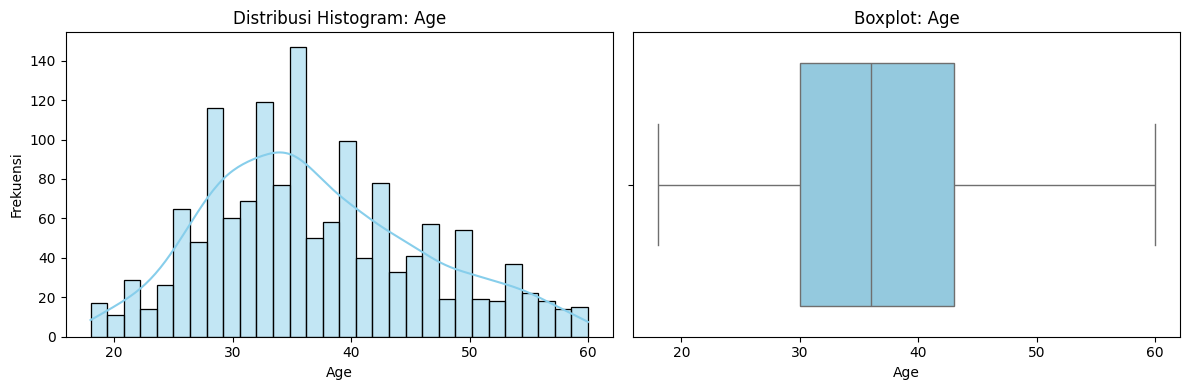

In [68]:
plot_numerik(df_employee_eda, 'Age')


Ringkasan Statistik untuk kolom: DailyRate
count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64


Visualisasi:


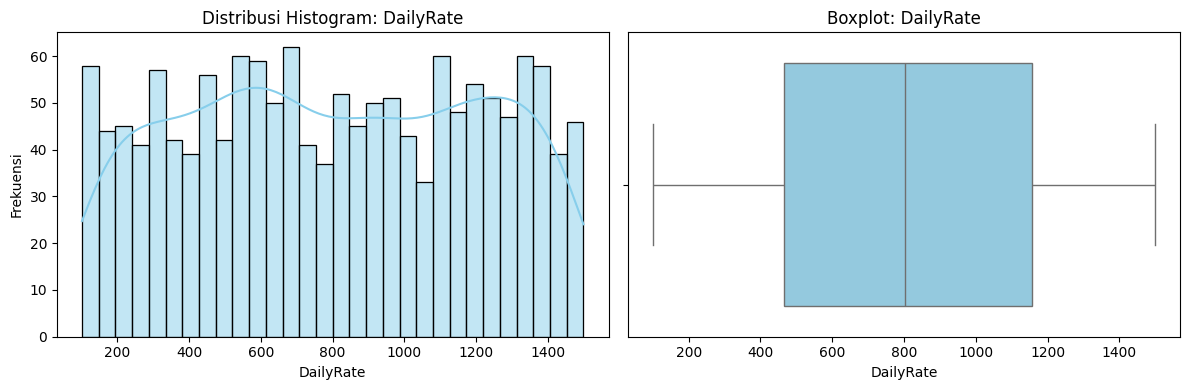

In [69]:
plot_numerik(df_employee_eda, 'DailyRate')


Ringkasan Statistik untuk kolom: DistanceFromHome
count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64


Visualisasi:


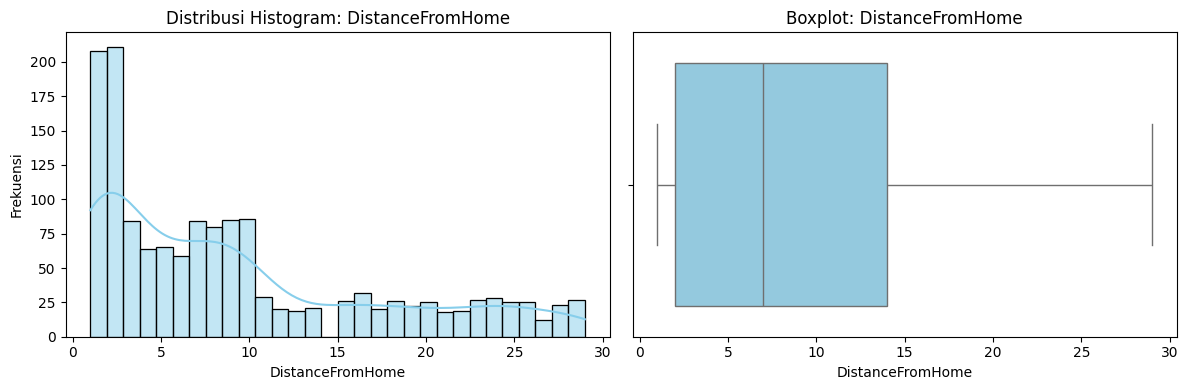

In [70]:
plot_numerik(df_employee_eda, 'DistanceFromHome')


Ringkasan Statistik untuk kolom: HourlyRate
count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64


Visualisasi:


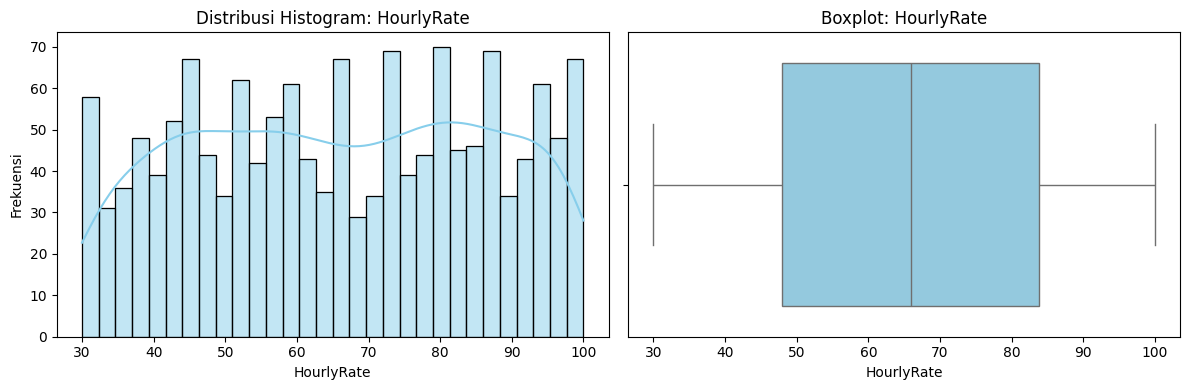

In [71]:
plot_numerik(df_employee_eda, 'HourlyRate')


Ringkasan Statistik untuk kolom: MonthlyIncome
count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64


Visualisasi:


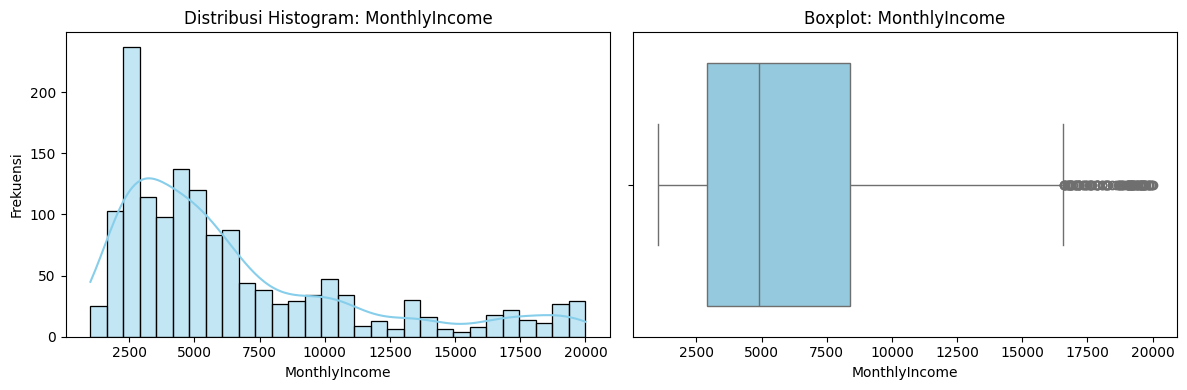

In [72]:
plot_numerik(df_employee_eda, 'MonthlyIncome')


Ringkasan Statistik untuk kolom: MonthlyRate
count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64


Visualisasi:


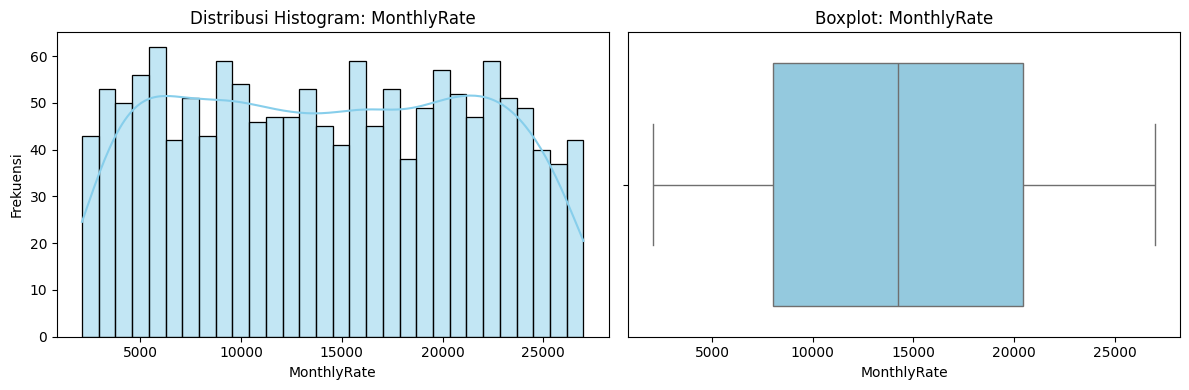

In [73]:
plot_numerik(df_employee_eda, 'MonthlyRate')


Ringkasan Statistik untuk kolom: NumCompaniesWorked
count    1470.000000
mean        2.693197
std         2.498009
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64


Visualisasi:


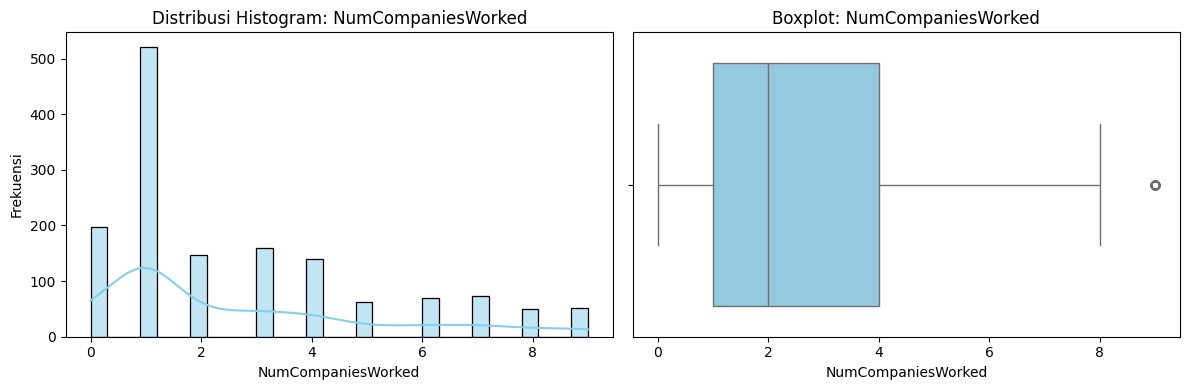

In [74]:
plot_numerik(df_employee_eda, 'NumCompaniesWorked')


Ringkasan Statistik untuk kolom: PercentSalaryHike
count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64


Visualisasi:


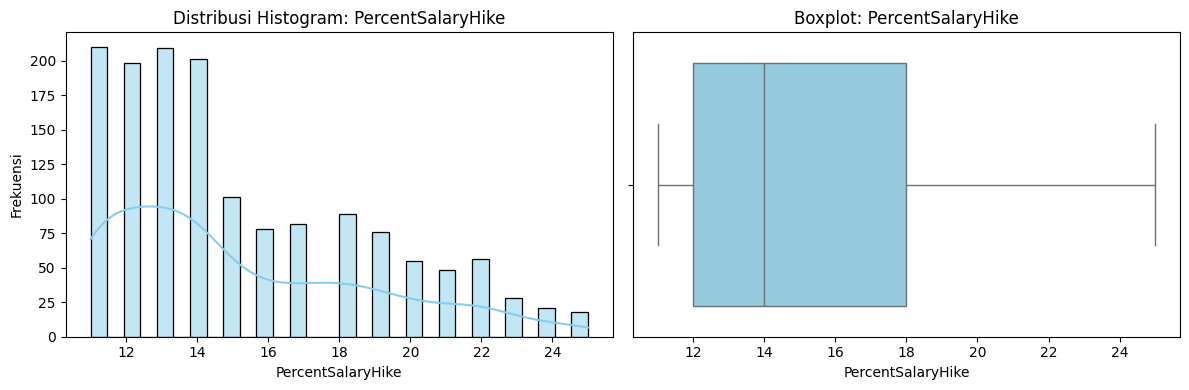

In [75]:
plot_numerik(df_employee_eda, 'PercentSalaryHike')


Ringkasan Statistik untuk kolom: TotalWorkingYears
count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64


Visualisasi:


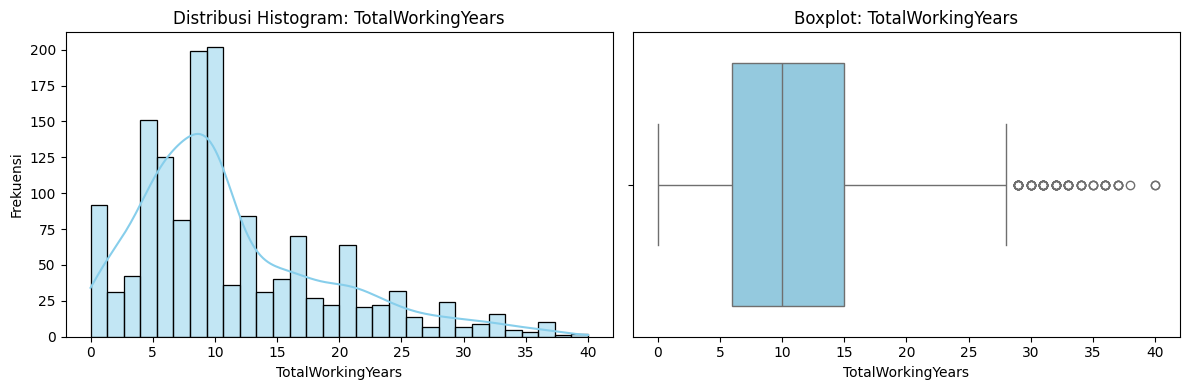

In [76]:
plot_numerik(df_employee_eda, 'TotalWorkingYears')


Ringkasan Statistik untuk kolom: TrainingTimesLastYear
count    1470.000000
mean        2.799320
std         1.289271
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64


Visualisasi:


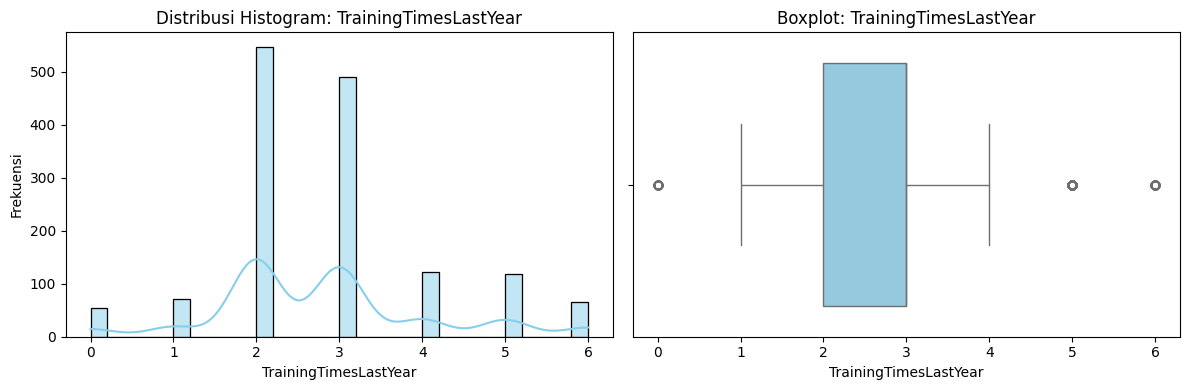

In [79]:
plot_numerik(df_employee_eda, 'TrainingTimesLastYear')


Ringkasan Statistik untuk kolom: YearsAtCompany
count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64


Visualisasi:


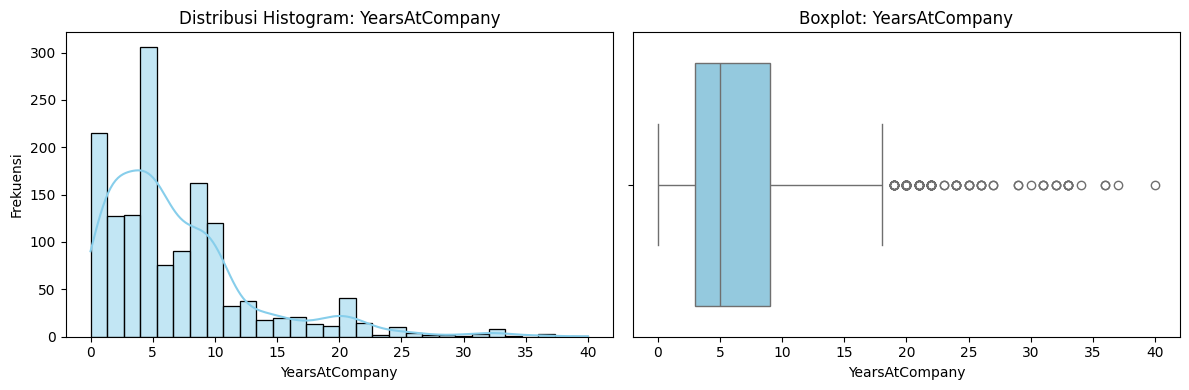

In [77]:
plot_numerik(df_employee_eda, 'YearsAtCompany')


Ringkasan Statistik untuk kolom: YearsInCurrentRole
count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64


Visualisasi:


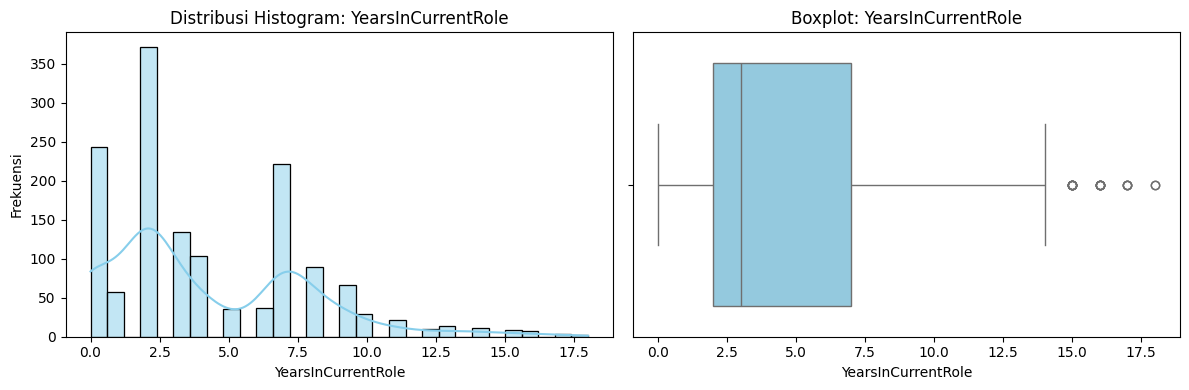

In [80]:
plot_numerik(df_employee_eda, 'YearsInCurrentRole')


Ringkasan Statistik untuk kolom: YearsSinceLastPromotion
count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64


Visualisasi:


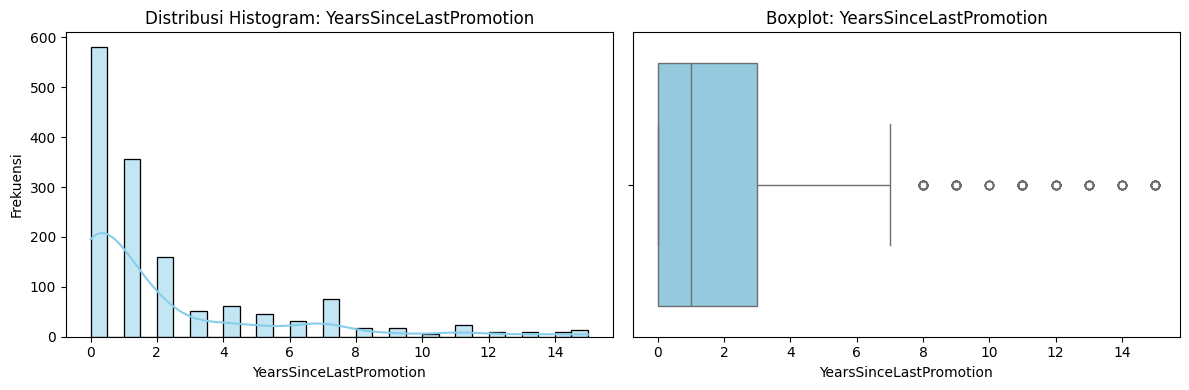

In [81]:
plot_numerik(df_employee_eda, 'YearsSinceLastPromotion')


Ringkasan Statistik untuk kolom: YearsWithCurrManager
count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64


Visualisasi:


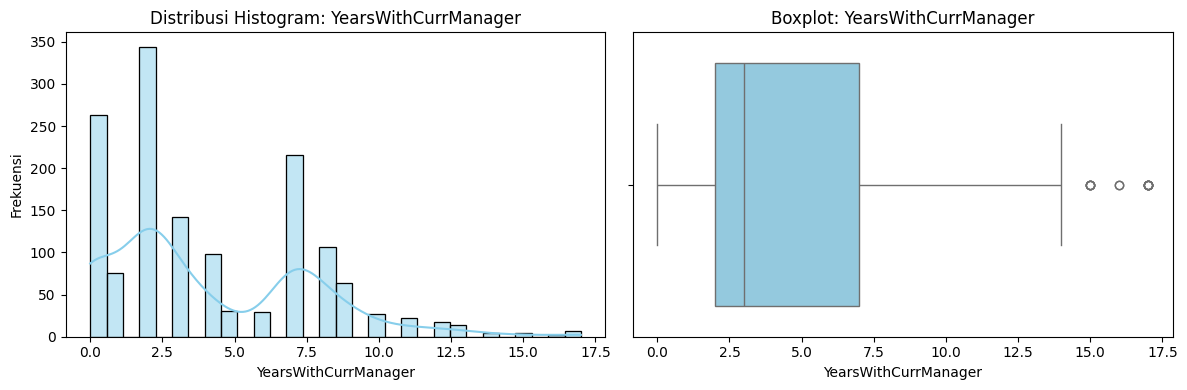

In [82]:
plot_numerik(df_employee_eda, 'YearsWithCurrManager')

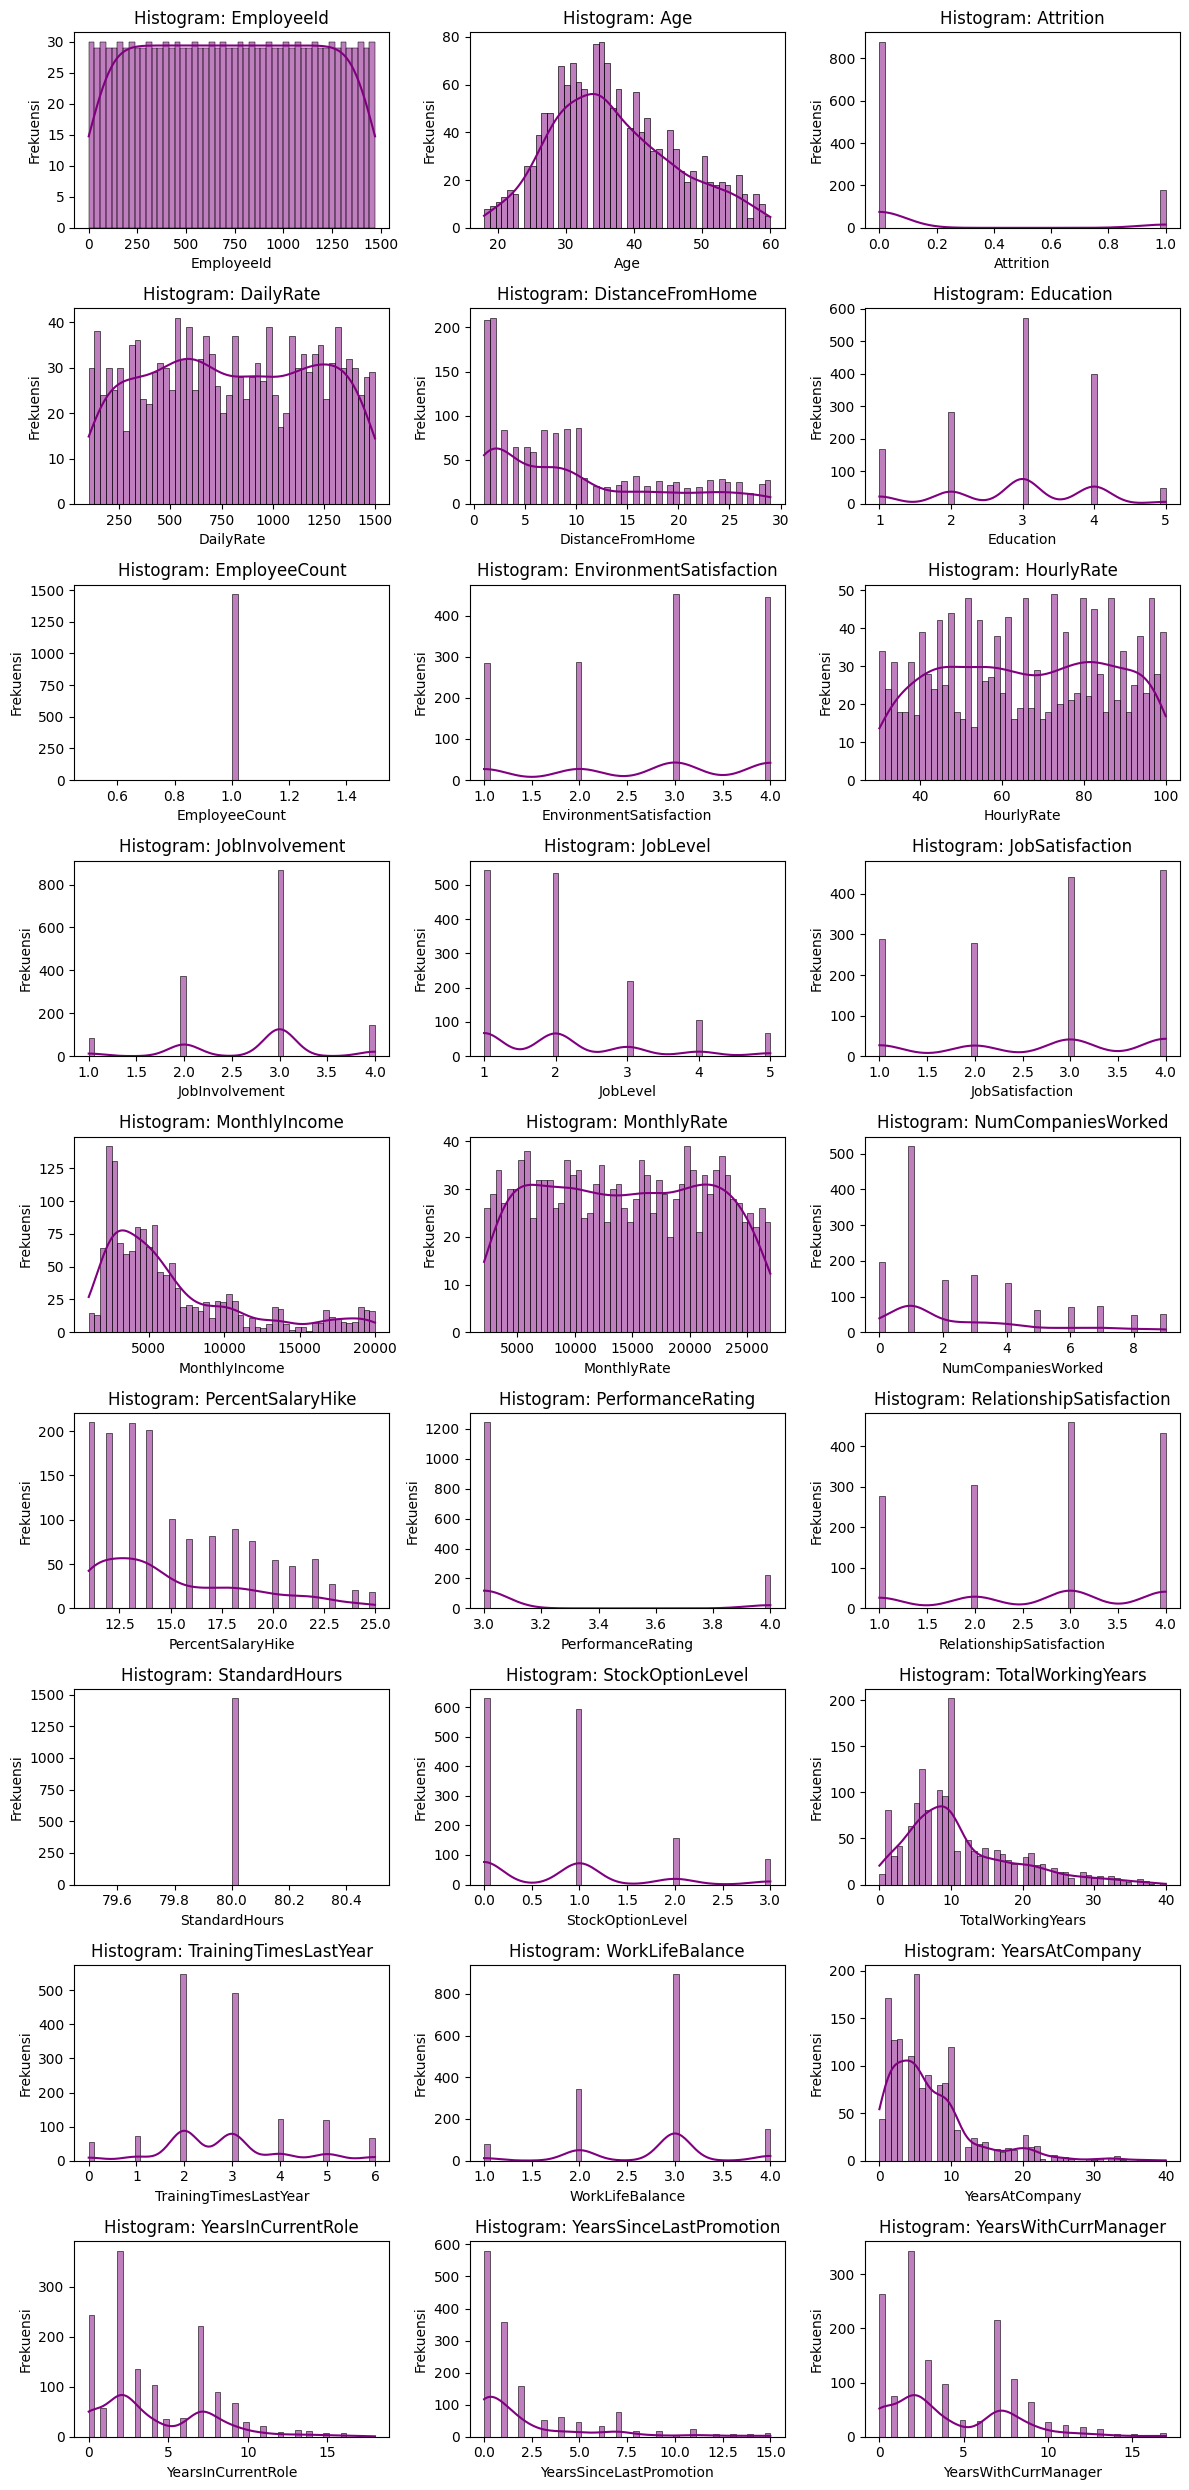

In [38]:
plot_histogram_semua_kolom(df_employee_eda)

#### Categorical Features

In [ ]:
ordinal_categorical_cols = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
    'StockOptionLevel', 'WorkLifeBalance'
]


Ringkasan untuk kolom: BusinessTravel
                   Jumlah Sampel  Persentase (%)
BusinessTravel                                  
Travel_Rarely               1043            71.0
Travel_Frequently            277            18.8
Non-Travel                   150            10.2


Visualisasi:


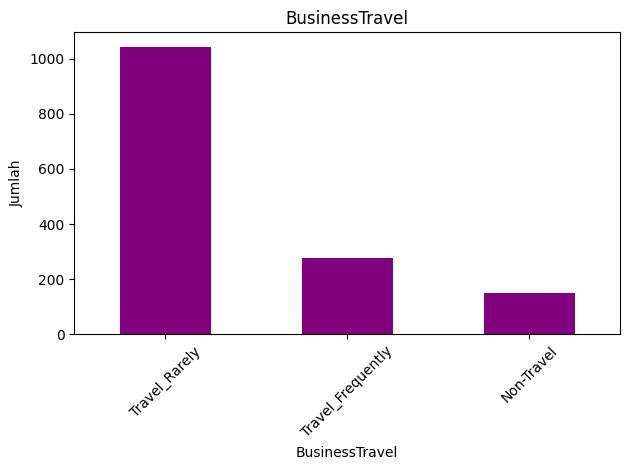

In [21]:
plot_kategori(df_employee_eda, 'BusinessTravel')


Ringkasan untuk kolom: Department
                        Jumlah Sampel  Persentase (%)
Department                                           
Research & Development            961            65.4
Sales                             446            30.3
Human Resources                    63             4.3


Visualisasi:


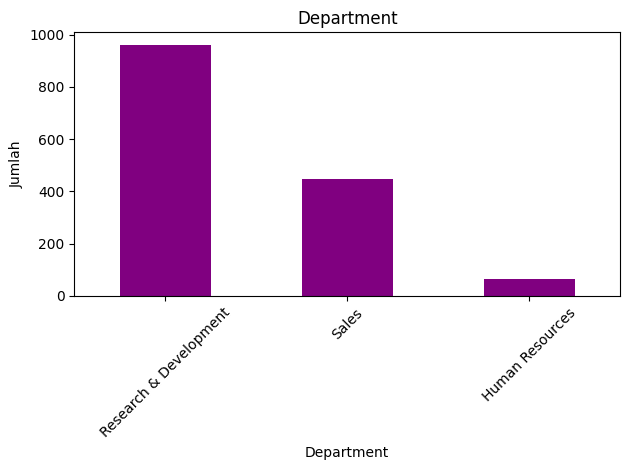

In [22]:
plot_kategori(df_employee_eda, 'Department')


Ringkasan untuk kolom: EducationField
                  Jumlah Sampel  Persentase (%)
EducationField                                 
Life Sciences               606            41.2
Medical                     464            31.6
Marketing                   159            10.8
Technical Degree            132             9.0
Other                        82             5.6
Human Resources              27             1.8


Visualisasi:


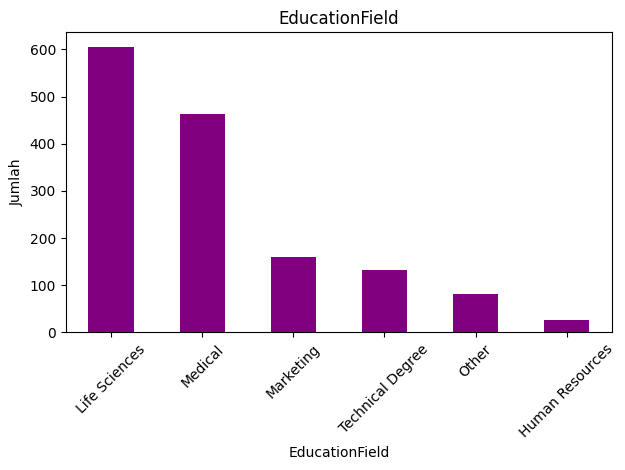

In [23]:
plot_kategori(df_employee_eda, 'EducationField')


Ringkasan untuk kolom: Gender
        Jumlah Sampel  Persentase (%)
Gender                               
Male              882            60.0
Female            588            40.0


Visualisasi:


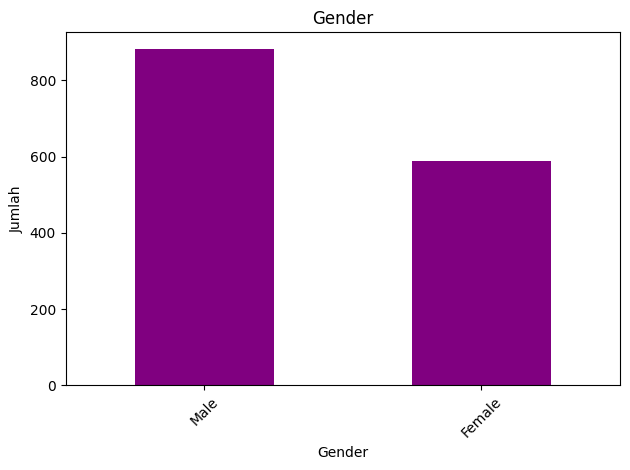

In [24]:
plot_kategori(df_employee_eda, 'Gender')


Ringkasan untuk kolom: JobRole
                           Jumlah Sampel  Persentase (%)
JobRole                                                 
Sales Executive                      326            22.2
Research Scientist                   292            19.9
Laboratory Technician                259            17.6
Manufacturing Director               145             9.9
Healthcare Representative            131             8.9
Manager                              102             6.9
Sales Representative                  83             5.6
Research Director                     80             5.4
Human Resources                       52             3.5


Visualisasi:


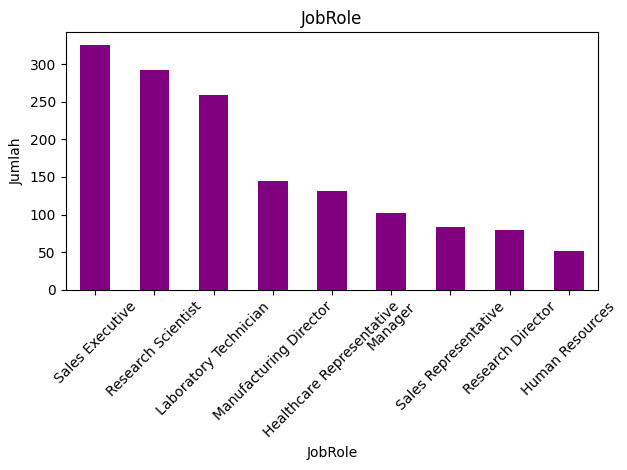

In [25]:
plot_kategori(df_employee_eda, 'JobRole')


Ringkasan untuk kolom: MaritalStatus
               Jumlah Sampel  Persentase (%)
MaritalStatus                               
Married                  673            45.8
Single                   470            32.0
Divorced                 327            22.2


Visualisasi:


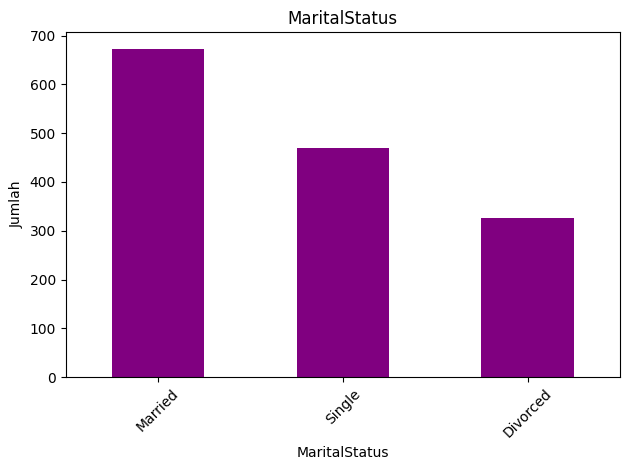

In [26]:
plot_kategori(df_employee_eda, 'MaritalStatus')


Ringkasan untuk kolom: Over18
        Jumlah Sampel  Persentase (%)
Over18                               
Y                1470           100.0


Visualisasi:


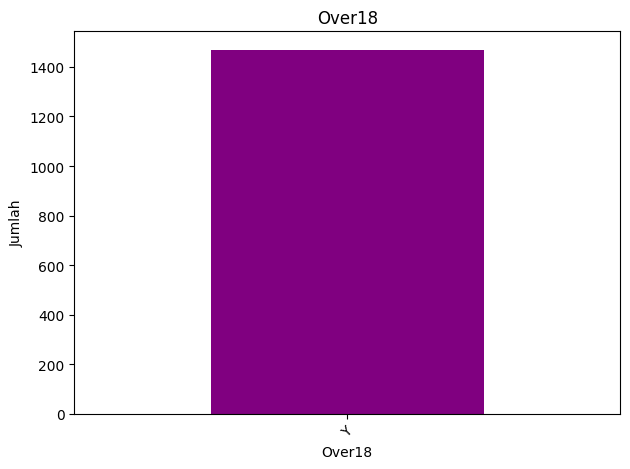

In [27]:
plot_kategori(df_employee_eda, 'Over18')


Ringkasan untuk kolom: OverTime
          Jumlah Sampel  Persentase (%)
OverTime                               
No                 1054            71.7
Yes                 416            28.3


Visualisasi:


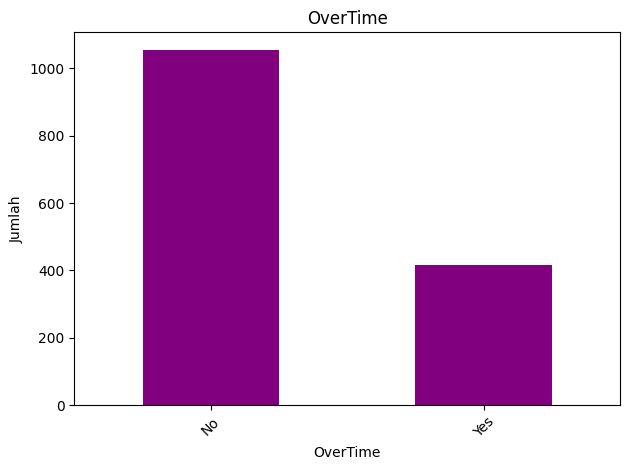

In [28]:
plot_kategori(df_employee_eda, 'OverTime')


Ringkasan untuk kolom: Education
           Jumlah Sampel  Persentase (%)
Education                               
3                    572            38.9
4                    398            27.1
2                    282            19.2
1                    170            11.6
5                     48             3.3


Visualisasi:


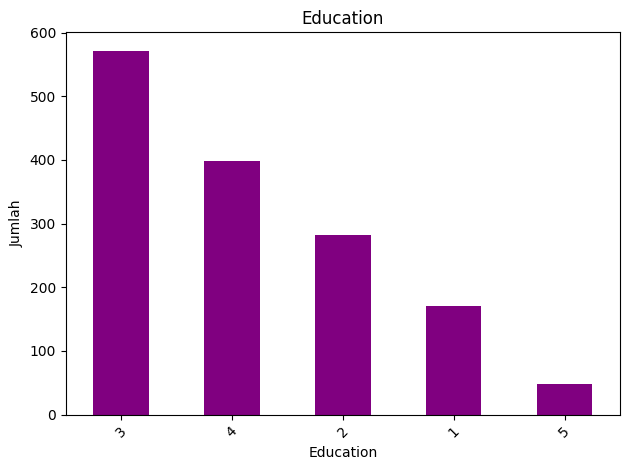

In [83]:
plot_kategori(df_employee_eda, 'Education')


Ringkasan untuk kolom: EnvironmentSatisfaction
                         Jumlah Sampel  Persentase (%)
EnvironmentSatisfaction                               
3                                  453            30.8
4                                  446            30.3
2                                  287            19.5
1                                  284            19.3


Visualisasi:


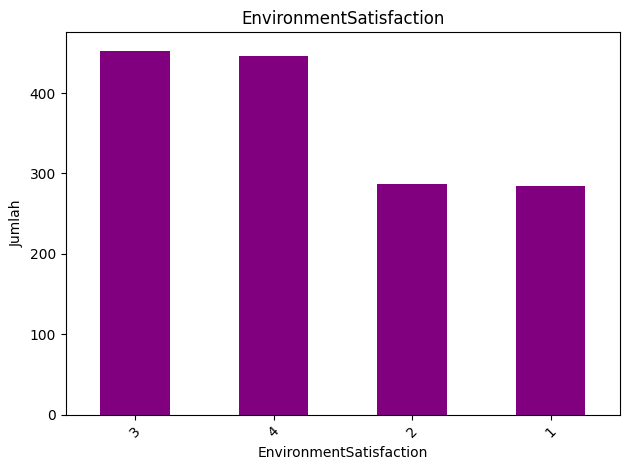

In [84]:
plot_kategori(df_employee_eda, 'EnvironmentSatisfaction')


Ringkasan untuk kolom: JobInvolvement
                Jumlah Sampel  Persentase (%)
JobInvolvement                               
3                         868            59.0
2                         375            25.5
4                         144             9.8
1                          83             5.6


Visualisasi:


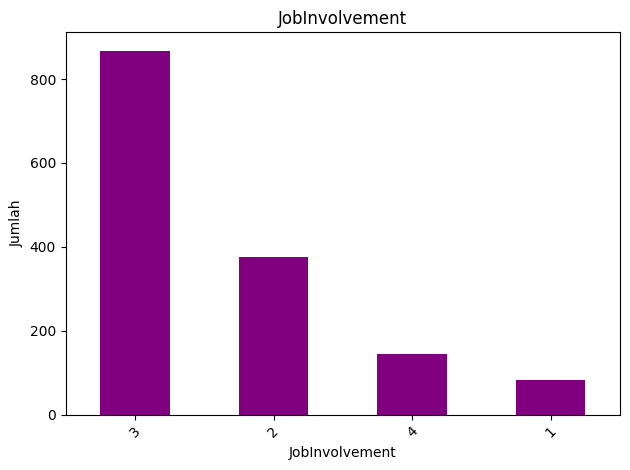

In [85]:
plot_kategori(df_employee_eda, 'JobInvolvement')


Ringkasan untuk kolom: JobLevel
          Jumlah Sampel  Persentase (%)
JobLevel                               
1                   543            36.9
2                   534            36.3
3                   218            14.8
4                   106             7.2
5                    69             4.7


Visualisasi:


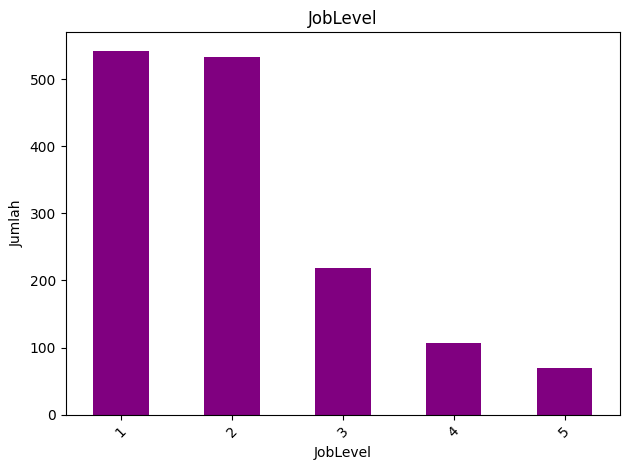

In [86]:
plot_kategori(df_employee_eda, 'JobLevel')


Ringkasan untuk kolom: JobSatisfaction
                 Jumlah Sampel  Persentase (%)
JobSatisfaction                               
4                          459            31.2
3                          442            30.1
1                          289            19.7
2                          280            19.0


Visualisasi:


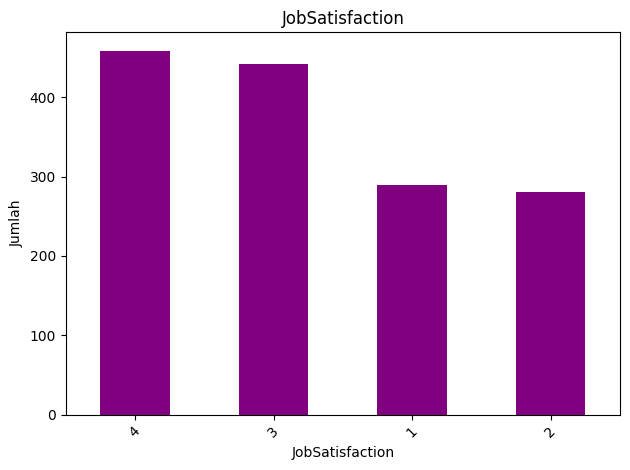

In [87]:
plot_kategori(df_employee_eda, 'JobSatisfaction')


Ringkasan untuk kolom: PerformanceRating
                   Jumlah Sampel  Persentase (%)
PerformanceRating                               
3                           1244            84.6
4                            226            15.4


Visualisasi:


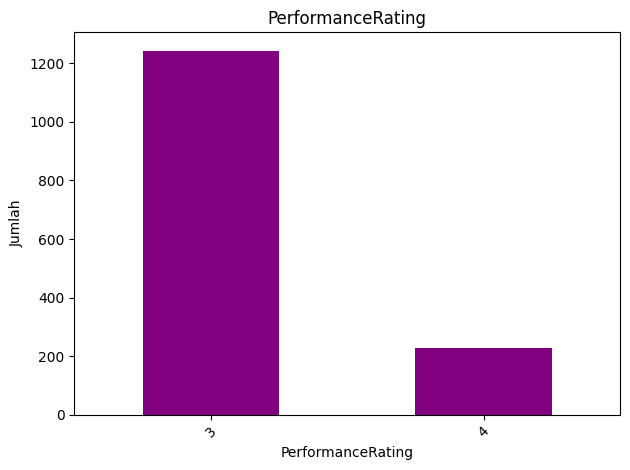

In [88]:
plot_kategori(df_employee_eda, 'PerformanceRating')


Ringkasan untuk kolom: RelationshipSatisfaction
                          Jumlah Sampel  Persentase (%)
RelationshipSatisfaction                               
3                                   459            31.2
4                                   432            29.4
2                                   303            20.6
1                                   276            18.8


Visualisasi:


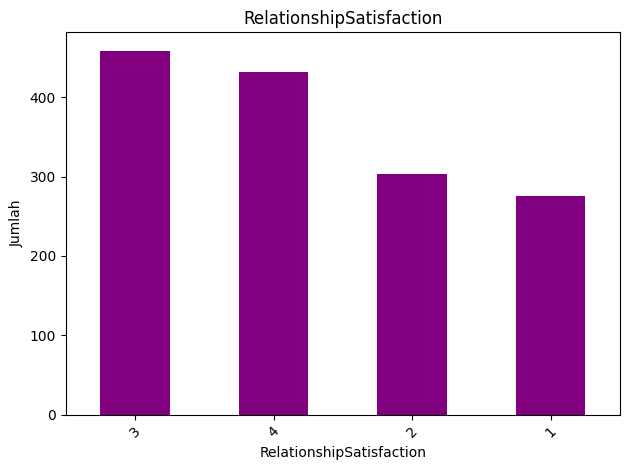

In [89]:
plot_kategori(df_employee_eda, 'RelationshipSatisfaction')


Ringkasan untuk kolom: StockOptionLevel
                  Jumlah Sampel  Persentase (%)
StockOptionLevel                               
0                           631            42.9
1                           596            40.5
2                           158            10.7
3                            85             5.8


Visualisasi:


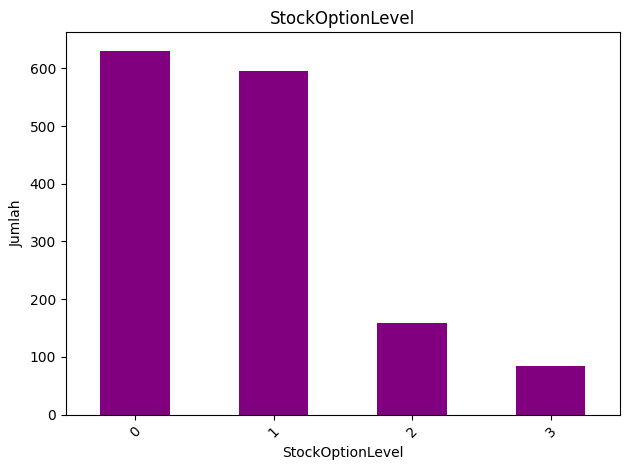

In [90]:
plot_kategori(df_employee_eda, 'StockOptionLevel')


Ringkasan untuk kolom: WorkLifeBalance
                 Jumlah Sampel  Persentase (%)
WorkLifeBalance                               
3                          893            60.7
2                          344            23.4
4                          153            10.4
1                           80             5.4


Visualisasi:


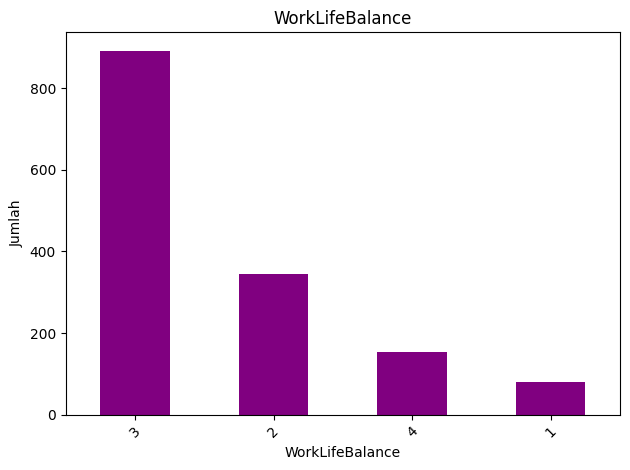

In [91]:
plot_kategori(df_employee_eda, 'WorkLifeBalance')

## Data Preparation